# Systems of axial bars

### Example from course reader

[[-0.00063662]
 [ 0.00243189]]


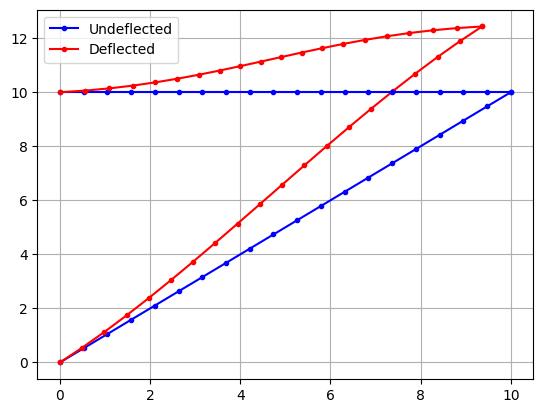

In [1]:
from FEA.FEA import *

A1 = np.array([
    [0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0]
])

A2 = np.array([
    [1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0]
])

E = 200e9
L1 = 10
L2 = 10 * 1.41
A = np.pi * (0.1 ** 2) / 4
angle1 = 0
angle2 = -135

element1 = Element(A1, E, 0, L1, A, angle1)
element2 = Element(A2, E, 0, L2, A, angle2)

Q = np.array([
    [0], 
    [100e3]
]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

# for element in structure.elements:
#     print(element.global_force)

print(structure.q)

# print(structure.elements[0].local_stiffness)
# print(structure.elements[1].local_stiffness)

nodes = np.array([
    [[0, 0], [10, 10]], 
    [[10, 10], [0, 10]]
])

structure.plot_structure(nodes, 1000, 20)

# Question 3

Could include errors from this question onwards in this document

In [2]:
assembly_mat_1 = np.array([
    [0, 0, 1, 0, 0, 0], 
    [0, 0, 0, 1, 0, 0]
])

assembly_mat_2 = np.array([
    [1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0]
])

element1 = Element(assembly_mat_1, 200e9, 0, 1.1, 400e-6, 0)
element2 = Element(assembly_mat_2, 200e9, 0, 0.8, 600e-6, 55)

Q = np.array([[0], [-20e3]]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

for element in structure.elements:
    print(element.global_force)

nodes = np.array([
    []
])

structure.plot_structure()

[[ 1.99999957e+04]
 [ 3.89494784e-04]
 [ 2.85629508e-04]
 [-1.99999957e+04]
 [-3.89494784e-04]
 [ 1.42814754e-04]]
[[-0.00028563]
 [-0.00432616]
 [-0.00089896]
 [ 0.00028563]
 [ 0.00432616]
 [-0.00089896]]


### choosing a different orientation (different assembly matrices)

In [3]:
assembly_mat_1 = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])
assembly_mat_2 = np.array([[0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0]])

element1 = Element(assembly_mat_1, 200e9, 0, 1.1, 400e-6, 0)
element2 = Element(assembly_mat_2, 200e9, 0, 0.8, 600e-6, 55)

Q = np.array([
    [0], 
    [-20e3]
]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

print(structure.q)

[[ 8.55903050e-12]
 [-4.05280857e-04]]


### Plotting the deformed shape graph

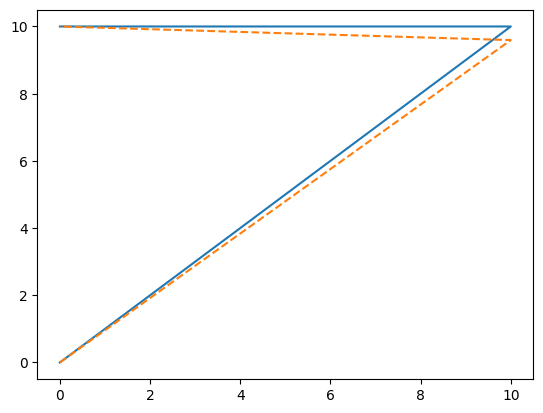

In [4]:
import matplotlib.pyplot as plt

mag = 1000

q1 = structure.q[0][0] * mag
q2 = structure.q[1][0] * mag

points = np.array([[0, 0], [10, 10], [0, 10]])
deflected_points =  np.array([[0, 0], [10 + q1, 10 + q2], [0, 10]])

plt.plot(points[:,0], points[:,1])
plt.plot(deflected_points[:,0], deflected_points[:,1], '--')

plt.show()

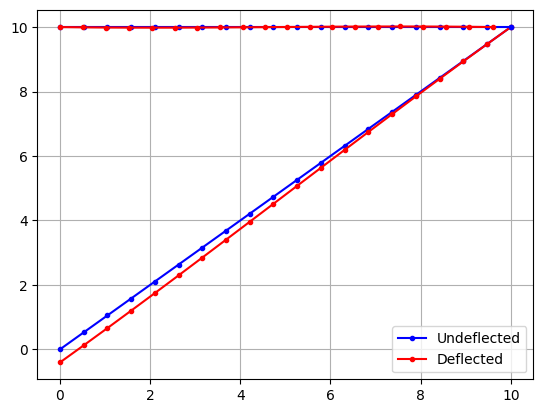

In [6]:
nodes = np.array([
    [[0, 0], [10, 10]], 
    [[10, 10], [0, 10]]
])

structure.plot_structure(nodes, 1000, 20)